In [1]:
user_agent = {""}
# Type your user agent in ""
# your user agent can be found here: https://www.whatismybrowser.com/detect/what-is-my-user-agent/

In [2]:
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Hannanum
import matplotlib.pyplot as plt
import random
import requests
import time
import re

In [ ]:
articles = []

for i in range(1, 1000):
    pg = str(i)
    res = requests.get(""+pg, {"User_Agent": user_agent}) # Type naver cafe's address in ""
    soup = bs(res.text, "html.parser")
    time.sleep(random.uniform(1,5))
    time.sleep(random.random())
    parsed_datas = soup.find_all("a", {"class": "article"})
    if len(parsed_datas) == 0:
        print(f"No articles found on page {pg}")
        break
    for data in parsed_datas:
        article_text = str(data).strip().replace("\n", "").replace("                                                                                                                                                                        ","").replace("                                                                                                ","")
        article_contents = re.findall(r'</span>(.*?)</a>', article_text)
        if article_contents:
           articles.append(article_contents[0].strip())
        
print(articles[:10])

In [23]:
hannanum = Hannanum()
words = []

for article in articles:
    nouns = hannanum.nouns(article)
    words+=nouns

print(len(words))

11618


In [ ]:
counter = Counter(words)

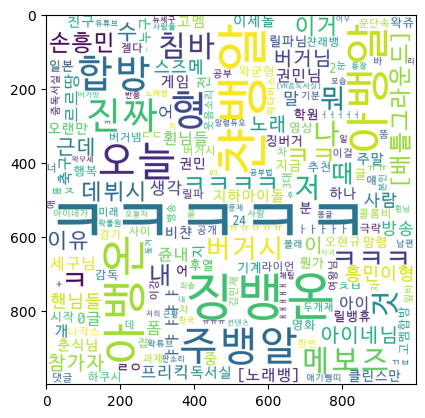

In [26]:
img = WordCloud(font_path = r"", # Type your font's location
    background_color="white",
    height = 1000,
    width = 1000).generate_from_frequencies(counter)
plt.imshow(img)